<a href="https://colab.research.google.com/github/vibh7/Employment_Sentiment_Analysis/blob/main/Sentiment_analysis_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidgauthier/glassdoor-job-reviews")

print("Path to dataset files:", path)

100%|██████████| 83.9M/83.9M [00:00<00:00, 98.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/davidgauthier/glassdoor-job-reviews/versions/11


In [ ]:
data=pd.read_csv(f"{path}/glassdoor_reviews.csv")
data

In [ ]:
data=data[["firm","overall_rating","headline","pros","cons"]]

In [ ]:
data.isnull().sum()

,0
firm,0
overall_rating,0
headline,2590
pros,2
cons,13


In [ ]:
data.dropna(inplace=True)

<ipython-input-6-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data.shape

(835961, 5)

In [ ]:
df=data.sample(10000,random_state=42)

In [ ]:
df.shape

(10000, 5)

In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")
df['sentiment'] = df['headline'].apply(lambda x: sentiment_analyzer(x)[0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
df

,firm,overall_rating,headline,pros,cons,sentiment
359152,IBM,3,Review,Good Work life balance in most of the projects,bad appraisal cycle and less transparency,"{'label': 'POSITIVE', 'score': 0.9946893453598..."
837136,next,3,Average,"Nice people, relax environment, COVID safe","Too many complicated systems, management do do...","{'label': 'POSITIVE', 'score': 0.7222251296043..."
395525,IBM,4,Excellent place to work,Great work life balance \r\nOn time salary \r\...,Less hike\r\nGDP is also less,"{'label': 'POSITIVE', 'score': 0.9998683929443..."
430916,J-P-Morgan,5,CRG,"Good work ethics, steep learning","Hectic schedule, work life balance not great","{'label': 'NEGATIVE', 'score': 0.9869675040245..."
97921,Best-Western,1,Manager did not do termination.,The Best Western Inn Tempe is very well respec...,When they lost the contract with the airline a...,"{'label': 'POSITIVE', 'score': 0.9874486327171..."
...,...,...,...,...,...,...
450116,KPMG,3,Deal Advisory,Financial Due Diligence is a great way to star...,"Long, unpredictable hours. Expect to work inve...","{'label': 'POSITIVE', 'score': 0.9893246293067..."
214864,Deloitte,5,Great Place,"Nice, friendly people. I enjoyed it",Sometimes disorganized so be careful,"{'label': 'POSITIVE', 'score': 0.9998757839202..."
210946,Deloitte,3,Overall an OKAY company,Good company for any beginners,Heavy workload\r\nNot worth after 2 years of work,"{'label': 'POSITIVE', 'score': 0.9998602867126..."
55498,B-and-M-Retail,4,Busy,"Always new things \r\nGood team work\r\nBusy, ...",Min wage\r\nCan be stressful when busy\r\nWork...,"{'label': 'NEGATIVE', 'score': 0.9995279312133..."


In [ ]:
df["label"]=df["sentiment"].apply(lambda x:x.get("label"))

In [ ]:
df["label"].replace({"POSITIVE":1,"NEGATIVE":0},inplace=True)
df

<ipython-input-13-bae5b0c96ff7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace({"POSITIVE":1,"NEGATIVE":0},inplace=True)
<ipython-input-13-bae5b0c96ff7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"].replace({"POSITIVE":1,"NEGATIVE":0},inplace=True)


,firm,overall_rating,headline,pros,cons,sentiment,label
359152,IBM,3,Review,Good Work life balance in most of the projects,bad appraisal cycle and less transparency,"{'label': 'POSITIVE', 'score': 0.9946893453598...",1
837136,next,3,Average,"Nice people, relax environment, COVID safe","Too many complicated systems, management do do...","{'label': 'POSITIVE', 'score': 0.7222251296043...",1
395525,IBM,4,Excellent place to work,Great work life balance \r\nOn time salary \r\...,Less hike\r\nGDP is also less,"{'label': 'POSITIVE', 'score': 0.9998683929443...",1
430916,J-P-Morgan,5,CRG,"Good work ethics, steep learning","Hectic schedule, work life balance not great","{'label': 'NEGATIVE', 'score': 0.9869675040245...",0
97921,Best-Western,1,Manager did not do termination.,The Best Western Inn Tempe is very well respec...,When they lost the contract with the airline a...,"{'label': 'POSITIVE', 'score': 0.9874486327171...",1
...,...,...,...,...,...,...,...
450116,KPMG,3,Deal Advisory,Financial Due Diligence is a great way to star...,"Long, unpredictable hours. Expect to work inve...","{'label': 'POSITIVE', 'score': 0.9893246293067...",1
214864,Deloitte,5,Great Place,"Nice, friendly people. I enjoyed it",Sometimes disorganized so be careful,"{'label': 'POSITIVE', 'score': 0.9998757839202...",1
210946,Deloitte,3,Overall an OKAY company,Good company for any beginners,Heavy workload\r\nNot worth after 2 years of work,"{'label': 'POSITIVE', 'score': 0.9998602867126...",1
55498,B-and-M-Retail,4,Busy,"Always new things \r\nGood team work\r\nBusy, ...",Min wage\r\nCan be stressful when busy\r\nWork...,"{'label': 'NEGATIVE', 'score': 0.9995279312133...",0


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer = PorterStemmer()

def preprocessor(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]|\d+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)
    print(f'Tokens: {tokens}')  # Debug print

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    print(f'Tokens after stopword removal: {tokens}')  # Debug print

    # Return the processed text
    return ' '.join(tokens)

print(preprocessor("I love this product!"))

Tokens: ['i', 'love', 'this', 'product']
Tokens after stopword removal: ['love', 'product']
love product


In [ ]:
df["processed_headline"] = df["headline"].apply(preprocessor)

Streaming output truncated to the last 5000 lines.
Tokens: ['slow']
Tokens after stopword removal: ['slow']
Tokens: ['great', 'company', 'to', 'work', 'for']
Tokens after stopword removal: ['great', 'compani', 'work']
Tokens: ['work', 'hard', 'but', 'rewards', 'well']
Tokens after stopword removal: ['work', 'hard', 'reward', 'well']
Tokens: ['good', 'brand']
Tokens after stopword removal: ['good', 'brand']
Tokens: ['good', 'place', 'to', 'start', 'but', 'not', 'to', 'stay']
Tokens after stopword removal: ['good', 'place', 'start', 'stay']
Tokens: ['enjoyable', 'at', 'first', 'but', 'ultimately', 'boring']
Tokens after stopword removal: ['enjoy', 'first', 'ultim', 'bore']
Tokens: ['good', 'job', 'rubbish', 'pay']
Tokens after stopword removal: ['good', 'job', 'rubbish', 'pay']
Tokens: ['be', 'a', 'tiny', 'cog', 'in', 'a', 'giant', 'machine']
Tokens after stopword removal: ['tini', 'cog', 'giant', 'machin']
Tokens: ['super']
Tokens after stopword removal: ['super']
Tokens: ['good', 'comp

In [ ]:
x = df['processed_headline']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=25)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred))

Accuracy=  0.8355


In [ ]:
review = "flexibility and career development"  # The review text you want to check

# Preprocess the review text
review_vectorized = tfidf.transform([review])

# Predict the sentiment using the trained model
sentiment = model.predict(review_vectorized)

print(sentiment)

[1]


In [ ]:
company_name=input("Enter the comapny name: ")
filtered_data=data[data["firm"]==company_name]

Enter the comapny name: IBM


In [ ]:
filtered_data["headline"]=filtered_data["headline"].apply(preprocessor)

Streaming output truncated to the last 5000 lines.
Tokens: ['great', 'company']
Tokens after stopword removal: ['great', 'compani']
Tokens: ['devops']
Tokens after stopword removal: ['devop']
Tokens: ['ibm', 'review']
Tokens after stopword removal: ['ibm', 'review']
Tokens: ['good', 'company', 'but', 'also', 'going', 'through', 'the', 'usual', 'corporate', 'pains']
Tokens after stopword removal: ['good', 'compani', 'also', 'go', 'usual', 'corpor', 'pain']
Tokens: ['good']
Tokens after stopword removal: ['good']
Tokens: ['good']
Tokens after stopword removal: ['good']
Tokens: ['dont', 'screw', 'up', 'your', 'career', 'here']
Tokens after stopword removal: ['dont', 'screw', 'career']
Tokens: ['very', 'good', 'company']
Tokens after stopword removal: ['good', 'compani']
Tokens: ['work', 'enviroment']
Tokens after stopword removal: ['work', 'enviro']
Tokens: ['pm', 'role']
Tokens after stopword removal: ['pm', 'role']
Tokens: ['pm', 'role']
Tokens after stopword removal: ['pm', 'role']
Tok

<ipython-input-33-823e2a6a0795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["headline"]=filtered_data["headline"].apply(preprocessor)


In [ ]:
vectors=tfidf.transform(filtered_data["headline"])

In [ ]:
filtered_data["sentiment"]=model.predict(vectors)

<ipython-input-35-81512a109919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["sentiment"]=model.predict(vectors)


In [ ]:
filtered_data.head(10)

,firm,overall_rating,headline,pros,cons,sentiment
341409,IBM,4,grass probabl less brown ibm mani compani,Availability of information resources to help ...,Politically correct (PC) version of diversity ...,0
341410,IBM,5,ibm still best compani work year year,IBM is a large company with a lot of great peo...,"It is a large company, and this isn't for ever...",1
341411,IBM,5,ibm good place work,IBM has a very structured approach to personal...,The main negative about working for IBM is tie...,1
341412,IBM,5,world oyster,Quality of the people I work with and the rewa...,The breadth of the value we can provide our cu...,1
341413,IBM,3,good compani tragic flaw,IBM is the largest education provider in the i...,Excessive hours. Mandatory travel. Persons who...,1
341414,IBM,2,best worst big busi,IBM is a large company with many opportunities...,It's a big company. It's easy to get lost. Sal...,0
341415,IBM,3,still big blue,Despite being big blue and all the connotation...,the size of the organisation can sometimes be ...,1
341416,IBM,4,ibm good compani work awar pittfal huge organ,"Global company, lots of career opportunities, ...","Very beaurocratic company, the procedures can ...",1
341417,IBM,3,place put fact,A company with vast opportunities,"As some members are established, tough to a ne...",1
341418,IBM,3,place put fact,A company with vast opportunities,"As some members are established, tough to a ne...",1


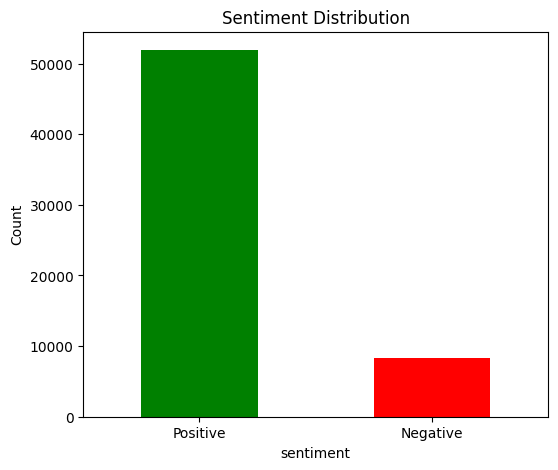

In [ ]:
sentiment_counts=filtered_data["sentiment"].value_counts()
plt.figure(figsize=(6, 5))  # Adjust figure size as needed

sentiment_counts.plot(kind='bar', color=['green', 'red'])  # Green for positive, red for negative

plt.title("Sentiment Distribution")
#plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1], ["Positive","Negative"],rotation=0)
plt.show()

In [ ]:
filtered_data["review"]=filtered_data["headline"]+" "+filtered_data["pros"]+" "+filtered_data["cons"]

<ipython-input-38-1023468e3bfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["review"]=filtered_data["headline"]+" "+filtered_data["pros"]+" "+filtered_data["cons"]


In [ ]:
# Concatenate all reviews into one large text block
all_reviews = "\n\n".join(filtered_data['review'].tolist())

In [ ]:
import os
import openai

# Set OpenAI API key from environment variable (for security purposes)
openai.api_key = "OPENAI API key"  # Make sure to set the environment variable `OPENAI_API_KEY`

def generate_summary_and_improvements(text, company):

    # Step 1: Generate summary
    response_summary = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f"Generate a summary for the following employee reviews from {company} company:\n\n{text}"
            }
        ],
        temperature=0.7,
    )

    summary = response_summary['choices'][0]['message']['content']

    # Step 2: Generate areas of improvement
    response_improvements = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f"Based on the employee reviews of {company}, provide key areas of improvement to enhance the employee experience in bullet points:\n\n{text}"
            }
        ],
        temperature=0.7,
    )

    improvements = response_improvements['choices'][0]['message']['content']

    return summary, improvements


# Generate summary and areas of improvement for the reviews
company_name = "Your Company Name"  # Replace with actual company name

# Make sure `all_reviews` is a list of reviews (up to 4000 characters in length)
# Here `all_reviews[:4000]` ensures that we don't exceed the token limit (this is a basic length check, refine as needed)
all_reviews = "Employee review text goes here..."  # Replace with actual reviews text
summary, improvements = generate_summary_and_improvements(all_reviews[:4000], company_name)

print("Summary of Reviews:\n", summary)
print("\nAreas of Improvement:\n", improvements)


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
